# Compare elements' isotherms


**Code:** #115-000

**File:** `apps/van_der_waals/compare_elements.ipynb`

-----------

The aim of this Notebook is to compare the isotherms of different elements.

## Interface

The main interface (``main_block_115_000``) is divided in two VBox: ``left_block`` and ``right_block``. ``left_block`` consists of four bqplot Figures and ``right_block`` contains ``fig_115_001``.

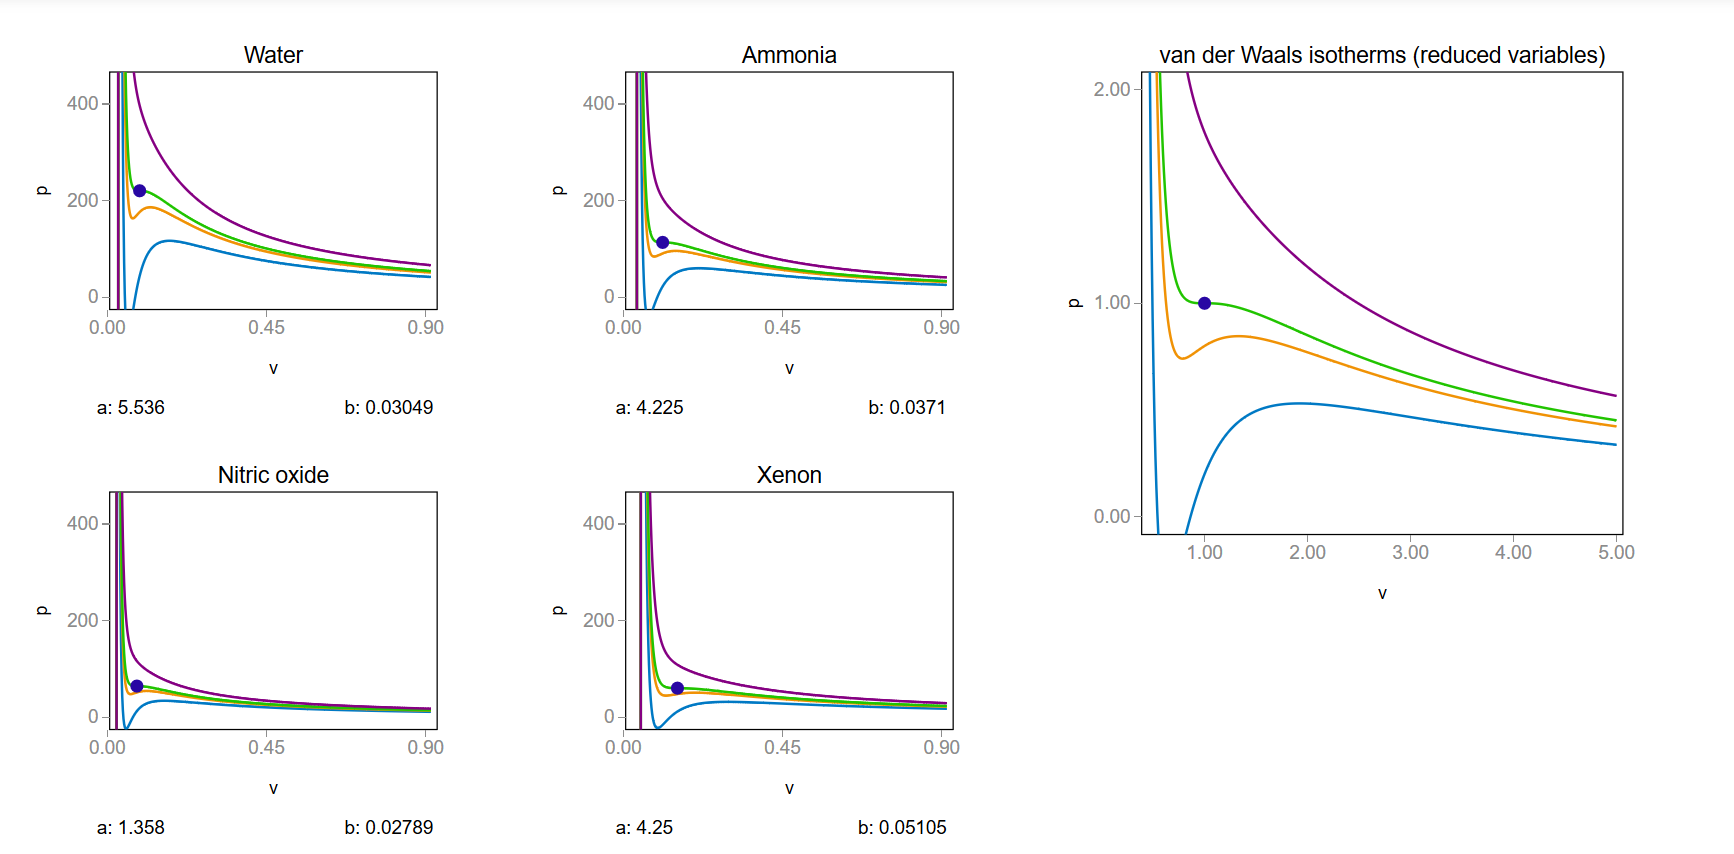

In [8]:
from IPython.display import Image
Image(filename='../../static/images/115-000_1.png')

## CSS

A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [2]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

## Packages

In [3]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

import urllib.parse
import webbrowser

import sys

## Physical functions

This are the functions that have a physical meaning:

- `calculate_critic` 
- `get_absolute_isotherms` 
- `get_relative_isotherms` 

In [4]:
def calculate_critic(a, b):
    
    """
        This function calculates the critic point 
        (p_c, v_c, T_c) from given a and b parameters of 
        the Van der Waals equation of state for real gases.
        
        :math:`(P + a \\frac{n^2}{V^2})(V - nb) = nRT`
        
        :math:`p_c = \\frac{a}{27 b^2}`
        :math:`v_c = 3b`
        :math:`T_c = \\frac{8a}{27 b R}`
        
   Args:
       a: Term related with the attraction between particles in
       L^2 bar/mol^2.\n
       b: Term related with the volume that is occupied by one 
       mole of the molecules in L/mol.\n
       
   Returns:
       p_c: Critical pressure in bar.\n
       v_c: Critical volume in L/mol.\n
       T_c: Critical tenperature in K.\n
        
    """
    
    if b == 0.0:
        return None
    
    k_B = 1.3806488e-23 #m^2 kg s^-2 K^-1
    N_A = 6.02214129e23 
    R = 0.082 * 1.01325 #bar L mol^-1 K^-1
    
    p_c = a/27.0/(b**2)
    v_c = 3.0*b
    T_c = 8.0*a/27.0/b/R
    
    return p_c, v_c, T_c

In [5]:
def get_absolute_isotherms(a, b, v_values, T_values):
    """This function calculates the theoretical p(v, T) plane 
        (in absolute coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        a: Term related with the attraction between particles in
           L^2 bar/mol^2.\n
        b: Term related with the volume that is occupied by one 
        mole of the molecules in L/mol.\n
        v_values: An array containing the values of v
        for which the isotherms must be calculated.\n
        T_values: An array containing the values of T for which
        the isotherms must be calculated.\n

        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """
    isotherms = []

    R = 0.082 * 1.01325 #bar L mol^-1 K^-1

    for T in T_values:
        
        isot = []
        
        for v in v_values:
            
            p = R*T/(v - b) - (a/v**2)
            isot = np.append(isot, p)
            
        isotherms.append(isot)
        
    return isotherms

In [6]:
def get_relative_isotherms(v_range, T_range):
    """This function calculates the theoretical p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of T
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n

        
    Returns:
        isotherms: A list consisted of numpy arrays containing the
        pressures of each isotherm.
    """

    isotherms = []

    for T in T_range:
        p_R = []
        for v in v_range:
            val = (8.0/3.0*T/(v - 1.0/3.0) - 3.0/v**2)
            p_R = np.append(p_R, val)

        isotherms.append(p_R)

    return isotherms

## Functions related to interaction

In [6]:
def change_view(change):
    """This function changes the visualization of all the
    components of the application so they are suitable for
    a projection.\n
    """
    
    obj = change.owner

    if obj.value:
        
        obj.description = 'Presentation mode (ON)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 30px ; }" \
            ".widget-label-basic {font-size: 30px;}" \
            "option {font-size: 25px;}" \
            ".p-Widget.jupyter-widgets.widget-slider.widget-vslider.widget-inline-vbox {width: auto}" \
            ".p-Widget .jupyter-widgets .widgets-label {width: auto; height: auto; font-size: 30px;}" \
            ".widget-label {font-size: 30px ; height: auto !important;}" \
            ".p-Widget .bqplot .figure .jupyter-widgets {height: auto !important;}" \
            ".widget-text input[type='number'] {font-size: 30px;height: auto;}" \
            ".option { font-size: 30px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button{font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.p-Panel.jupyter-widgets.widget-container.widget-box.widget-vbox {padding-bottom: 30px}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 30px;}" \
            ".q-grid .slick-cell {font-size: 30px;}" \
            ".slick-column-name {font-size: 30px;}" \
            ".widget-html-content {font-size: 30px;}"
            "</style>"
            )
        )

        for figure in figures:
            
            figure.legend_text = {'font-size': '30px'}
            figure.title_style = {'font-size': '30px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '30px'}
                axis.label_style = {'font-size': '30px'}
        
    else:
        
        obj.description = 'Presentation mode (OFF)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 14px ;}" \
            ".widget-label-basic {font-size: 14px;}" \
            "option {font-size: 12px;}" \
            ".p-Widget .jupyter-widgets .widgets-label {font-size: 14px;}" \
            ".widget-label {font-size: 14px ;}" \
            ".widget-text input[type='number'] {font-size: 14px;}" \
            ".option { font-size: 14px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 14px;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button {font-size: 14px;}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 14px;}" \
            ".q-grid .slick-cell {font-size: 14px;}" \
            ".slick-column-name {font-size: 14px;}" \
            ".widget-html-content {font-size: 14px;}"
            "</style>"
            )
        )
        
        for figure in figures:
            
            figure.legend_text = {'font-size': '14px'}
            figure.title_style = {'font-size': '20px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '14px'}
                axis.label_style = {'font-size': '14px'}

In [18]:
def prepare_export(button):
    """This function sends the selected plot to the 'export_plot'
    function.
    """

    if button is prepare_export_fig_0_button:
        
        export_plot(figures[0])
        
    elif button is prepare_export_fig_1_button:
        
        export_plot(figures[1])
        
    elif button is prepare_export_fig_2_button:
        
        export_plot(figures[2])
        
    elif button is prepare_export_fig_3_button:
        
        export_plot(figures[3])
        
    elif button is prepare_export_fig_115_001_button:
        
        export_plot(fig_115_001)

In [19]:
def export_plot(plot):
    """This function sends the selected plot to the export module.
    """
    
    global data
    
    text_lines = []
    
    np.set_printoptions(threshold=sys.maxsize)
    
    tooltips = []
    
    for mark in plot.marks:
        tooltips.append(mark.tooltip)
        mark.tooltip = None
    
    data =  repr((plot, text_lines))
    
    %store data
    
    rel_url = "../../../apps/modules/export_module.ipynb"
    abs_url = urllib.parse.urljoin(notebook_url, rel_url)

    if not webbrowser.open(abs_url):
        go_to_export_button.value = "<form action=" + abs_url + " target='_blank'><button type=''submit''>Open in export module</button></form>"
        
    for i in range(len(plot.marks)):
        mark = plot.marks[i]
        mark.tooltip = tooltips[i]

In [20]:
%%javascript 

//Get the URL of the current notebook

var kernel = Jupyter.notebook.kernel; 
var command = ["notebook_url = ",
               "'", window.location.href, "'" ].join('')

kernel.execute(command)

<IPython.core.display.Javascript object>

## Main interface

In [21]:
#(a, b, element's name)
parameters = [(5.536, 0.03049, 'Water'),
             (4.225, 0.0371, 'Ammonia'),
             (1.358, 0.02789, 'Nitric oxide'),
             (4.25, 0.05105, 'Xenon')]

colors = ['#0079c4','#f09205','#21c400', '#850082']

#I want to show the same range in v so you can compare the isotherms of all the elements
#so, let's calculate the critic point of the first one and use as a reference for the rest

p_c1, v_c1, T_c1 = calculate_critic(parameters[0][0], parameters[0][1])
v_values = np.linspace(0.8*parameters[0][1], 10*v_c1, 500)

scale_x = bqs.LinearScale(min = min(v_values), max = max(v_values))
scale_y = bqs.LinearScale(min = 0.0, max = 2.0*p_c1)

axis_x = bqa.Axis(
    scale=scale_x,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values=[0, 0.45, 0.9],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y = bqa.Axis(
    scale=scale_y,
    tick_format='.0f',
    tick_style={'font-size': '15px'},
    tick_values=[0, 200, 400],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

main_block_115_000 = widgets.VBox(
    [],
    layout=widgets.Layout(width='100%')
)

left_block = widgets.VBox(
    [],
    layout=widgets.Layout(width='60%')
)

right_block = widgets.VBox(
    [],
    layout=widgets.Layout(width='40%')
)

h_block_1 = widgets.HBox([])
left_block.children = [h_block_1]

if len(parameters) > 3:

    h_block_2 = widgets.HBox([])
    left_block.children = [
        h_block_1,
        h_block_2
    ]

figures = []    

for i in range(len(parameters)):
    
    elem = parameters[i]
    
    a = elem[0]
    b = elem[1]
    name = elem[2]
    
    p_c, v_c, T_c = calculate_critic(a, b)
    
    T_values = [0.8*T_c, 0.95*T_c, T_c, 1.2*T_c]
    T_values_str = [str(t) for t in T_values]
    
    isotherms = get_absolute_isotherms(a, b, v_values, T_values)
    
    block = widgets.VBox(
        [],
        layout=widgets.Layout(width='100%')
    )
    
    marks = []
    
    lines = bqm.Lines(
        x = [v_values for elem in isotherms], 
        y = isotherms, 
        scales = {'x': scale_x, 'y': scale_y}, 
        opacities = [1.0],
        visible = True, #True, #t == '1.00',
        colors = colors,
        labels = T_values_str,
    )
    
    critical_point = bqm.Scatter(
        name = '',
        x = [v_c],
        y = [p_c],
        scales = {'x': scale_x, 'y': scale_y}, 
        default_opacities = [1.0],
        visible = True,
        colors = ['#2807a3'],
    )
    
    marks = [
        lines,
        critical_point
    ]

    fig = Figure(
        title=name,
        marks=marks,
        axes=[axis_x, axis_y],
        animation_duration=0, 
        legend_location='top-right',
        background_style= {'fill': 'white',  'stroke': 'black'},
        min_aspect_ratio=1.0,
        fig_margin=dict(top=80, bottom=60, left=80, right=30),
        toolbar = True,
        layout = widgets.Layout(width='90%', height='250px')
    )
    
    figures.append(fig)
    
    block.children = [
        fig,
        widgets.HBox([
            widgets.HTML(value='a: '+str(a)),
            widgets.HTML(value='b: '+str(b)),
        ],
            layout=widgets.Layout(
                    align_self='center',
                    justify_content='space-around',
                    width='100%'
                )        
        )
        
    ]  

    if i > 1:
        h_block_2.children = h_block_2.children + (block,)
        
    else:
        h_block_1.children = h_block_1.children + (block,)

v_values = np.linspace(0.45, 5.0, 500)
T_values = [0.8, 0.95, 1.0, 1.2]
T_values_str = [str(t) for t in T_values]
relative_isotherms = get_relative_isotherms(v_values, T_values)        

scale_x = bqs.LinearScale(min = 0.45, max = 5.0)
scale_y = bqs.LinearScale(min = 0.0, max = 2.0)

axis_x = bqa.Axis(
    scale=scale_x,
    tick_format='0.2f',
    tick_style={'font-size': '15px'},
    tick_values=[1,2,3,4,5],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y = bqa.Axis(
    scale=scale_y,
    tick_format='0.2f',
    tick_style={'font-size': '15px'},
    tick_values=[0,1,2],
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_115_001 = Figure(
    title='van der Waals isotherms (reduced variables)',
    marks=[],
    axes=[axis_x, axis_y],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    min_aspect_ratio=1.0,
    fig_margin=dict(top=80, bottom=60, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(width='90%')
)

lines = bqm.Lines(
    x = [v_values for elem in relative_isotherms], 
    y = relative_isotherms, 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [1.0],
    visible = True,
    colors = colors,
    labels = T_values_str,
)

critical_point = bqm.Scatter(
    name = '',
    x = [1.0],
    y = [1.0],
    scales = {'x': scale_x, 'y': scale_y}, 
    default_opacities = [1.0],
    visible = True,
    colors = ['#2807a3'],
)

fig_115_001.marks = [
    lines,
    critical_point
]

right_block.children = [fig_115_001]

change_view_button = widgets.ToggleButton(
    value=False,
    description='Presentation mode (OFF)',
    disabled=False,
    button_style='',
    tooltip='',
    icon='desktop',
    layout=widgets.Layout(
        width='initial',
        align_self='center'
    )
)

change_view_button.observe(change_view, 'value')

prepare_export_fig_0_button = widgets.Button(
        description='Export '+parameters[0][2],
        disabled=False,
        button_style='',
        tooltip='',
    )

prepare_export_fig_0_button.on_click(prepare_export)

prepare_export_fig_1_button = widgets.Button(
        description='Export '+parameters[1][2],
        disabled=False,
        button_style='',
        tooltip='',
    )

prepare_export_fig_1_button.on_click(prepare_export)

prepare_export_fig_2_button = widgets.Button(
        description='Export '+parameters[2][2],
        disabled=False,
        button_style='',
        tooltip='',
    )

prepare_export_fig_2_button.on_click(prepare_export)

prepare_export_fig_3_button = widgets.Button(
        description='Export '+parameters[3][2],
        disabled=False,
        button_style='',
        tooltip='',
    )

prepare_export_fig_3_button.on_click(prepare_export)

prepare_export_fig_115_001_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
    layout=widgets.Layout(
        align_self = 'center',
    )
)

prepare_export_fig_115_001_button.on_click(prepare_export)

left_block.children = left_block.children + (
    widgets.HBox([
        prepare_export_fig_0_button,
        prepare_export_fig_1_button,
        prepare_export_fig_2_button,
        prepare_export_fig_3_button
    ],
    layout=widgets.Layout(
        align_self = 'center',
    )
    ),
)

right_block.children = right_block.children + (
    prepare_export_fig_115_001_button,
)

main_block_115_000.children = [
    change_view_button,
    widgets.HBox([
        left_block,
        right_block,
    ])
]

figures.append(fig_115_001)

main_block_115_000

Stored 'data' (str)
